# Copy files

Brief 1-2 sentence description of notebook.

TODO: Supplement the description
- Notebook that extracts the timestamps and gets the time that tones played

In [1]:
# Imports of all used packages and libraries
import sys
import os
import glob
from collections import defaultdict

In [2]:
import zipfile


# Functions

## Inputs & Data

- Explanation of each input and where it comes from.

Inputs and Required data loading
- input variable names are in all caps snake case
- Whenever an input changes or is used for processing 
- The variables are all lower in snake case

In [3]:
# Path of the directory that contains the Spike Gadgets recording and the exported timestamp files
# Exported with this tool https://docs.spikegadgets.com/en/latest/basic/ExportFunctions.html
# Export these files:
    # -raw – Continuous raw band export.
    # -dio – Digital IO channel state change export.
    # -analogio – Continuous analog IO export.
# INPUT_DIR = "/scratch/back_up/reward_competition_extention/final_proc/phy_curation"
# INPUT_DIR = "/scratch/back_up/reward_competition_extention/data/rce_cohort_3"
INPUT_DIR = "/orange/ruogu.fang/data/UKB/brain"
OUTPUT_DIR = os.path.join("/blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI") # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)


# Processing

# Copying the files over

In [4]:
import shutil
import glob
import os



In [5]:

# for p in sorted(glob.glob('*/*/*.npy', recursive=True, root_dir=INPUT_DIR)):
#     if "copies" in p:
#         continue
#     print(p)
#     if os.path.isfile(os.path.join(INPUT_DIR, p)):
#         os.makedirs(os.path.join(OUTPUT_DIR, os.path.dirname(p)), exist_ok=True)
#         if not os.path.exists(os.path.join(OUTPUT_DIR, p)):
#             shutil.copy(os.path.join(INPUT_DIR, p), os.path.join(OUTPUT_DIR, p))
#         else:
#             print("{} exists".format(os.path.join(OUTPUT_DIR, p)))



In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
diagnosis_df = pd.read_pickle("./proc/trimmed_icd.pkl")

In [8]:
diagnosis_df

,eid,31-0.0,21022-0.0,all_diagnoses,mental_and_neural_diagnoses,has_any_diagnosis,has_mental_or_neural_diagnosis,has_PD,has_AD,has_BPD,has_SZ,has_ASD,has_MCI,has_MDD
0,1000014,1,63,"[I10, K20, K227, K30, K449, N300, R101, R31, R...",[],True,False,False,False,False,False,False,False,False
1,1000023,1,48,"[M179, N359, R31, Z302]",[],True,False,False,False,False,False,False,False,False
2,1000030,0,65,"[D051, D509, K224, K573, R69]",[],True,False,False,False,False,False,False,False,False
3,1000041,0,53,"[H269, H353, M2323]",[],True,False,False,False,False,False,False,False,False
4,1000059,0,48,[],[],False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502304,6025359,1,62,"[I251, M4806, N40, N47, R798]",[],True,False,False,False,False,False,False,False,False
502305,6025362,0,53,"[M169, Z038]",[],True,False,False,False,False,False,False,False,False
502306,6025377,1,58,[],[],False,False,False,False,False,False,False,False,False
502307,6025386,0,43,[],[],False,False,False,False,False,False,False,False,False


- Checking which rows we have data for

In [109]:
all_files = sorted(glob.glob('/orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/*', recursive=True, root_dir=INPUT_DIR))

In [110]:
all_IDS = [os.path.basename(path).split("_")[0] for path in all_files]

In [111]:
all_IDS[:20]

['1000023',
 '1000086',
 '1000317',
 '1000503',
 '1000665',
 '1000768',
 '1000925',
 '1001109',
 '1001390',
 '1001631',
 '1001784',
 '1001851',
 '1001900',
 '1002112',
 '1002308',
 '1002819',
 '1003319',
 '1003639',
 '1003750',
 '1004075']

In [112]:
diagnosis_df["file_downloaded"] = diagnosis_df["eid"].astype(str).isin(all_IDS)

In [114]:
diagnosis_df = diagnosis_df[diagnosis_df["file_downloaded"]].copy()

(array([1255., 1837., 2068., 2296., 2613., 2887., 3281., 2985., 1952.,
        1107.]),
 array([40., 43., 46., 49., 52., 55., 58., 61., 64., 67., 70.]),
 <BarContainer object of 10 artists>)

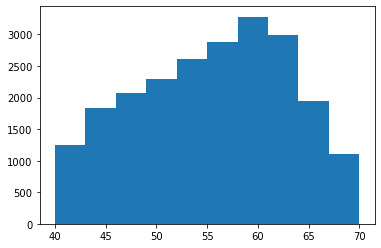

In [115]:
plt.hist(diagnosis_df["21022-0.0"])

(array([1., 0., 0., 0., 0., 0., 1., 1., 2., 1.]),
 array([42. , 44.5, 47. , 49.5, 52. , 54.5, 57. , 59.5, 62. , 64.5, 67. ]),
 <BarContainer object of 10 artists>)

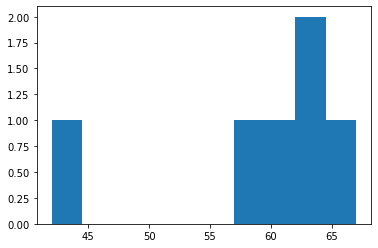

In [116]:
plt.hist(diagnosis_df[diagnosis_df["has_AD"]]["21022-0.0"])

In [145]:
# filtered_diagnosis_df = diagnosis_df[(diagnosis_df["31-0.0"] == 0) & (diagnosis_df["21022-0.0"] >= 50) & (diagnosis_df["21022-0.0"] <= 70)]
filtered_diagnosis_df = diagnosis_df

(array([1255., 1837., 2068., 2296., 2613., 2887., 3281., 2985., 1952.,
        1107.]),
 array([40., 43., 46., 49., 52., 55., 58., 61., 64., 67., 70.]),
 <BarContainer object of 10 artists>)

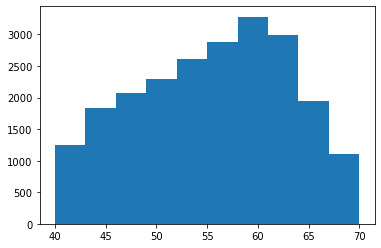

In [146]:
plt.hist(filtered_diagnosis_df["21022-0.0"])

(array([1., 0., 0., 0., 0., 0., 1., 1., 2., 1.]),
 array([42. , 44.5, 47. , 49.5, 52. , 54.5, 57. , 59.5, 62. , 64.5, 67. ]),
 <BarContainer object of 10 artists>)

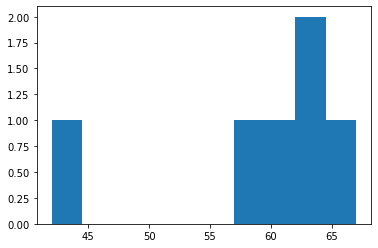

In [147]:
plt.hist(filtered_diagnosis_df[filtered_diagnosis_df["has_AD"]]["21022-0.0"])

In [148]:
has_columns = [col for col in filtered_diagnosis_df.columns if "has" in col] 


# filtered_diagnosis_df.head()

In [149]:
has_columns

['has_any_diagnosis',
 'has_mental_or_neural_diagnosis',
 'has_PD',
 'has_AD',
 'has_BPD',
 'has_SZ',
 'has_ASD',
 'has_MCI',
 'has_MDD']

In [150]:
# Print group counts for each "has" column
for col in has_columns:
    print(f"Column: {col}")
    print(filtered_diagnosis_df[col].value_counts())
    print("-" * 30)

Column: has_any_diagnosis
True     19358
False     2923
Name: has_any_diagnosis, dtype: int64
------------------------------
Column: has_mental_or_neural_diagnosis
False    20651
True      1630
Name: has_mental_or_neural_diagnosis, dtype: int64
------------------------------
Column: has_PD
False    22276
True         5
Name: has_PD, dtype: int64
------------------------------
Column: has_AD
False    22275
True         6
Name: has_AD, dtype: int64
------------------------------
Column: has_BPD
False    22261
True        20
Name: has_BPD, dtype: int64
------------------------------
Column: has_SZ
False    22276
True         5
Name: has_SZ, dtype: int64
------------------------------
Column: has_ASD
False    22280
True         1
Name: has_ASD, dtype: int64
------------------------------
Column: has_MCI
False    22280
True         1
Name: has_MCI, dtype: int64
------------------------------
Column: has_MDD
False    22261
True        20
Name: has_MDD, dtype: int64
--------------------------

In [152]:
filtered_diagnosis_df[filtered_diagnosis_df["has_mental_or_neural_diagnosis"]]

,eid,31-0.0,21022-0.0,all_diagnoses,mental_and_neural_diagnoses,has_any_diagnosis,has_mental_or_neural_diagnosis,has_PD,has_AD,has_BPD,has_SZ,has_ASD,has_MCI,has_MDD,file_downloaded
534,1005351,0,62,"[G459, L024, R410]",[G459],True,True,False,False,False,False,False,False,False,True
581,1005828,0,46,"[F229, N921, R69]",[F229],True,True,False,False,False,False,False,False,False,True
695,1006964,0,51,[G560],[G560],True,True,False,False,False,False,False,False,False,True
842,1008431,1,52,"[D333, G933, J051, K449, R073, R101, R104]",[G933],True,True,False,False,False,False,False,False,False,True
964,1009657,0,67,"[G576, R101, R104, S0600]",[G576],True,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501438,6016692,0,55,"[D220, G510, L989]",[G510],True,True,False,False,False,False,False,False,False,True
501705,6019366,0,57,"[G560, M179, M1997, M2323]",[G560],True,True,False,False,False,False,False,False,False,True
501907,6021387,0,60,"[G560, K638]",[G560],True,True,False,False,False,False,False,False,False,True
501933,6021640,0,53,[G454],[G454],True,True,False,False,False,False,False,False,False,True


In [153]:
# Convert lists to individual rows and count occurrences
counts = filtered_diagnosis_df["mental_and_neural_diagnoses"].explode().value_counts()

In [154]:
counts_df = pd.DataFrame(counts)

In [155]:
counts_df.sort_values(["mental_and_neural_diagnoses"], ascending=False).head(n=20)

,mental_and_neural_diagnoses
G560,512
G459,124
G439,115
G473,86
G576,76
G562,60
G454,39
G35,35
G479,34
G510,28


- Neurological diseases that can be used
    - MDD
    - BPD
    - AD
    - PD
        - 100 each
- 600 healthy controls

## Selecting the relevant subjects

## MDD

- Including

F33.0 Recurrent depressive disorder, current episode mild67
F33.1 Recurrent depressive disorder, current episode moderate207
F33.2 Recurrent depressive disorder, current episode severe without psychotic symptoms203
F33.8 Other recurrent depressive disorders6
F33.9 Recurrent depressive disorder, unspecified

- Not including

F33.3 Recurrent depressive disorder, current episode severe with psychotic symptoms178
F33.4 Recurrent depressive disorder, currently in remission17


In [123]:
# List of ICD-10 codes to check
disease_codes = {"F330", "F331", "F332", "F338", "F339"}  # Use a set for faster lookup

# Filter the DataFrame
MDD_filtered_diagnosis_df = filtered_diagnosis_df[
    filtered_diagnosis_df["mental_and_neural_diagnoses"].apply(
        lambda x: any(code in x for code in disease_codes) and len(x) <= 2
    )
].copy()

In [124]:
MDD_filtered_diagnosis_df.shape

(1, 15)

## BPD

- Including

F31.0 Bipolar affective disorder, current episode hypomanic219
F31.1 Bipolar affective disorder, current episode manic without psychotic symptoms207
F31.2 Bipolar affective disorder, current episode manic with psychotic symptoms190
F31.6 Bipolar affective disorder, current episode mixed71
F31.9 Bipolar affective disorder, unspecified

- Not including
F31.3 Bipolar affective disorder, current episode mild or moderate depression124
F31.4 Bipolar affective disorder, current episode severe depression without psychotic symptoms75
F31.5 Bipolar affective disorder, current episode severe depression with psychotic symptoms52
F31.7 Bipolar affective disorder, currently in remission41
F31.8 Other bipolar affective disorders25

In [66]:
# List of ICD-10 codes to check
disease_codes = {"F310", "F311", "F312", "F316", "F319"}  # Use a set for faster lookup

# Filter the DataFrame
BPD_filtered_diagnosis_df = filtered_diagnosis_df[
    filtered_diagnosis_df["mental_and_neural_diagnoses"].apply(
        lambda x: any(code in x for code in disease_codes) and len(x) <= 2
    )
].copy()

In [67]:
BPD_filtered_diagnosis_df.shape

(80, 14)

## AD

- Including
G30.0 Alzheimer's disease with early onset50
G30.1 Alzheimer's disease with late onset58
G30.8 Other Alzheimer's disease147
G30.9 Alzheimer's disease, unspecified

In [83]:
# List of ICD-10 codes to check
disease_codes = {"G309"}  # Use a set for faster lookup

# Filter the DataFrame
AD_filtered_diagnosis_df = filtered_diagnosis_df[
    filtered_diagnosis_df["mental_and_neural_diagnoses"].apply(
        lambda x: any(code in x for code in disease_codes) and len(x) <= 1
    )
].copy()

In [84]:
AD_filtered_diagnosis_df.shape

(126, 14)

## PD

- Including

G20 Parkinson's disease

In [80]:
# List of ICD-10 codes to check
disease_codes = {"G20"}  # Use a set for faster lookup

# Filter the DataFrame
PD_filtered_diagnosis_df = filtered_diagnosis_df[
    filtered_diagnosis_df["mental_and_neural_diagnoses"].apply(
        lambda x: any(code in x for code in disease_codes) and len(x) <= 1
    )
].copy()

In [81]:
PD_filtered_diagnosis_df.shape

(165, 14)

In [82]:
filtered_diagnosis_df.shape

(114667, 14)

## Healthy controls

In [88]:
# Filter the DataFrame
controls_filtered_diagnosis_df = filtered_diagnosis_df[
    filtered_diagnosis_df["all_diagnoses"].apply(
        lambda x: len(x) <= 0
    )
].copy()

In [89]:
controls_filtered_diagnosis_df

,eid,31-0.0,21022-0.0,all_diagnoses,mental_and_neural_diagnoses,has_any_diagnosis,has_mental_or_neural_diagnosis,has_PD,has_AD,has_BPD,has_SZ,has_ASD,has_MCI,has_MDD
185,1001865,0,63,[],[],False,False,False,False,False,False,False,False,False
195,1001969,0,63,[],[],False,False,False,False,False,False,False,False,False
331,1003325,0,63,[],[],False,False,False,False,False,False,False,False,False
457,1004582,0,63,[],[],False,False,False,False,False,False,False,False,False
616,1006179,0,64,[],[],False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502120,6023511,0,60,[],[],False,False,False,False,False,False,False,False,False
502135,6023665,0,62,[],[],False,False,False,False,False,False,False,False,False
502136,6023679,0,60,[],[],False,False,False,False,False,False,False,False,False
502192,6024234,0,60,[],[],False,False,False,False,False,False,False,False,False


- Stratified sampling for age

In [96]:
controls_filtered_diagnosis_df = controls_filtered_diagnosis_df.groupby('21022-0.0').apply(
    lambda x: x.sample(frac=0.1)
).reset_index(drop=True)

## Copying files over

- Putting together all dataframes

In [99]:
all_filtered_diagnosis_df = pd.concat([MDD_filtered_diagnosis_df, BPD_filtered_diagnosis_df, PD_filtered_diagnosis_df, AD_filtered_diagnosis_df, controls_filtered_diagnosis_df]).sort_values(["eid"]).reset_index()

In [100]:
all_filtered_diagnosis_df

,index,eid,31-0.0,21022-0.0,all_diagnoses,mental_and_neural_diagnoses,has_any_diagnosis,has_mental_or_neural_diagnosis,has_PD,has_AD,has_BPD,has_SZ,has_ASD,has_MCI,has_MDD
0,156,1001578,0,63,"[G20, L022, R100]",[G20],True,True,True,False,False,False,False,False,False
1,157,1001583,0,69,"[E041, F332, H269, H531, H810, I634, J459, K29...",[F332],True,True,False,False,False,False,False,False,True
2,430,1001865,0,63,[],[],False,False,False,False,False,False,False,False,False
3,877,1008780,0,63,"[G309, J189, J22, L720, R13]",[G309],True,True,False,True,False,False,False,False,False
4,1187,1011886,0,64,"[G20, H258, H264, R400, R55]",[G20],True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,500534,6007654,0,68,"[D509, G20, J22, K029, K623, M1397, M189, M549...",[G20],True,True,True,False,False,False,False,False,False
1224,180,6011781,0,61,[],[],False,False,False,False,False,False,False,False,False
1225,100,6014958,0,60,[],[],False,False,False,False,False,False,False,False,False
1226,501715,6019462,0,65,"[G309, I269, K297, K30, K573, M169, N840, R104...",[G309],True,True,False,True,False,False,False,False,False


In [101]:
all_files = sorted(glob.glob('/orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/*', recursive=True, root_dir=INPUT_DIR))

In [102]:
all_IDS = [os.path.basename(path).split("_")[0] for path in all_files]

In [103]:
all_IDS[:20]

['1000023',
 '1000086',
 '1000317',
 '1000503',
 '1000665',
 '1000768',
 '1000925',
 '1001109',
 '1001390',
 '1001631',
 '1001784',
 '1001851',
 '1001900',
 '1002112',
 '1002308',
 '1002819',
 '1003319',
 '1003639',
 '1003750',
 '1004075']

- Getting all the file paths for healthy ADs

In [104]:
# Convert diagnosis_df["eid"] to a set for O(1) lookups
eid_set = set(all_filtered_diagnosis_df["eid"].astype(str))

# Use list comprehension with set lookup
filtered_IDS = [string for string in all_IDS if string in eid_set]

In [108]:
len(eid_set)

1228

In [105]:
len(filtered_IDS)

38

In [106]:
len(all_files)

22288

# Copying files over

In [15]:
import zipfile
import os

In [16]:
INPUT_DIR

'/orange/ruogu.fang/data/UKB/brain'

In [17]:
OUTPUT_DIR

'/blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI'

In [21]:
# Define the target file path inside each zip
TARGET_FILE = "fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz"

current_subject = 0
for subject_ID in filtered_IDS:
    current_subject += 1
    for zip_path in sorted(glob.glob(f"{INPUT_DIR}/20227_rsfMRI_NIFTI/**/*{subject_ID}*.zip", recursive=True)):
        print(f"Processing: {current_subject} / {len(filtered_IDS)}")
        print(f"Processing: {zip_path}")

        # Check if the zip file exists and is a valid zip
        if not os.path.isfile(zip_path):
            print(f"Error: ZIP file not found: {zip_path}")
            continue  # Skip this file and move to the next

        try:
            # Open the ZIP file
            with zipfile.ZipFile(zip_path, "r") as zip_ref:
                # Check if the target file exists in the ZIP archive
                if TARGET_FILE in zip_ref.namelist():
                    # Define the extraction path
                    subject_output_dir = os.path.join(OUTPUT_DIR, subject_ID)
                    os.makedirs(subject_output_dir, exist_ok=True)

                    # Extract only the target file
                    extracted_path = zip_ref.extract(TARGET_FILE, subject_output_dir)
                    print(f"Extracted: {extracted_path}")
                else:
                    print(f"Target file not found in {zip_path}")
        except zipfile.BadZipFile:
            print(f"Error: Invalid ZIP file: {zip_path}")
        except zipfile.LargeZipFile:
            print(f"Error: ZIP file is too large and requires ZIP64 support: {zip_path}")
        except Exception as e:
            print(f"Unexpected error processing {zip_path}: {str(e)}")


Processing: 1 / 22281
Processing: /orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/1000023_20227_2_0.zip
Extracted: /blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI/1000023/fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz
Processing: 2 / 22281
Processing: /orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/1000086_20227_2_0.zip
Extracted: /blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI/1000086/fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz
Processing: 3 / 22281
Processing: /orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/1000317_20227_2_0.zip
Extracted: /blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI/1000317/fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz
Processing: 4 / 22281
Processing: /orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/1000503_20227_2_0.zip
Extracted: /blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI/100

KeyboardInterrupt: 

In [ ]:
def unzip_files_recursively(root_dir):
    """
    Recursively walk through root_dir, find .zip files, and unzip them.
    If a .zip file is in a folder containing 'zip' in its name, it will be
    extracted to a parallel folder with 'unzip' in its name instead.
    """
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.lower().endswith('.zip'):
                zip_file_path = os.path.join(dirpath, filename)
                
                # Remove the .zip extension to get the extraction folder name
                extraction_folder_name = os.path.splitext(filename)[0]
                
                # Check if the parent folder name contains 'zip'
                parent_folder = os.path.basename(dirpath)
                if 'zip' in parent_folder.lower():
                    # Replace 'zip' with 'unzip' in the parent folder name
                    new_parent_folder = parent_folder.lower().replace('zip', 'unzip')
                    
                    # The parent of the parent folder
                    parent_of_parent = os.path.dirname(dirpath)
                    
                    # Construct the path to the new folder
                    new_unzip_folder_path = os.path.join(parent_of_parent, new_parent_folder)
                    
                    # Final path: new folder + subfolder named after the ZIP file
                    final_extraction_path = os.path.join(new_unzip_folder_path, extraction_folder_name)
                    
                else:
                    # If 'zip' is not in the parent folder, just unzip in the same folder
                    final_extraction_path = os.path.join(dirpath, extraction_folder_name)
                
                # Make sure the target extraction directory exists
                os.makedirs(final_extraction_path, exist_ok=True)
                
                # Unzip the file
                with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                    zip_ref.extractall(final_extraction_path)
                
                print(f"Unzipped '{zip_file_path}' to '{final_extraction_path}'")

In [ ]:
# unzip_files_recursively("../../data/UKB/brain/AD")